In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
tauL = 10e-15 ## Duración Pulso Láser (10 fs)
alpha = 1.2027e8 ## Absorption Coefficient Aluminium (m ^-1)
pen_depth = 2/alpha
A = 1 - 0.94512 ## 1 - Reflectance
gamma = 3e17 ## Coupling electron-phonon
Ce_aux = 0.912e-3/27 ## J/(mol K**2)
F = 5.09e17 ## W/m^2
Fa = F*A

### Femtosecond Pulses

#### Temperatura Electrónica

In [3]:
tauL = 10e-15 ## Duración Pulso Láser (10 fs)
T0 = 300 ## Temperatura inicial electrones (300 K)

start_t = 0
stop_t = tauL ## Duración del pulso láser, luego irá decayendo)
dt = 1e-15

start_z = 0
stop_z = 1e-8 ## Profundidad de finalización? 10 um
dz = 1e-11
t = np.linspace(start_t,stop_t,int((stop_t - start_t)/dt))
z = np.linspace(start_z, stop_z,int((stop_z-start_z)/dz))

In [4]:
Te = []
for zz in z:
    Te.append((T0**2 + ( 2 * Fa * alpha / Ce_aux ) * t * np.exp( - alpha * zz ))**0.5)

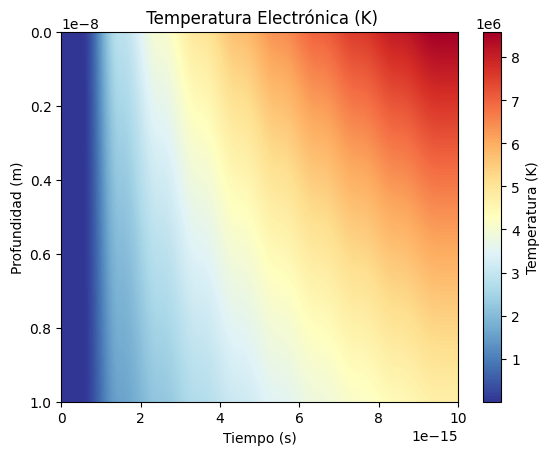

In [5]:
plt.imshow(Te,extent = [t[0],t[-1],z[-1],z[0]],aspect='auto',cmap = "RdYlBu_r")
plt.xlabel("Tiempo (s)")
plt.ylabel("Profundidad (m)")
plt.title(" Temperatura Electrónica (K)" )
cbar = plt.colorbar(cmap = "RdYlBu_r")
cbar.set_label('Temperatura (K)', rotation=90)

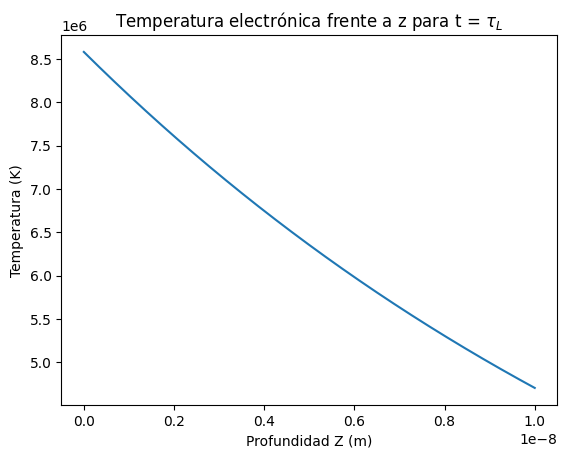

In [19]:
Te_tauL = ((2 * Fa * alpha/Ce_aux)* tauL)**0.5 * np.exp(-z/pen_depth)
plt.plot(z,Te_tauL)
plt.title(r"Temperatura electrónica frente a z para t = $\tau_L$ ")
plt.ylabel("Temperatura (K)")
plt.xlabel("Profundidad Z (m)")
plt.show()

#### Temperatura Lattice

In [20]:
Ci = 24.3 ## J/(mol K)

In [24]:
Ti = Te_tauL**2 * Ce_aux/(2 * Ci)

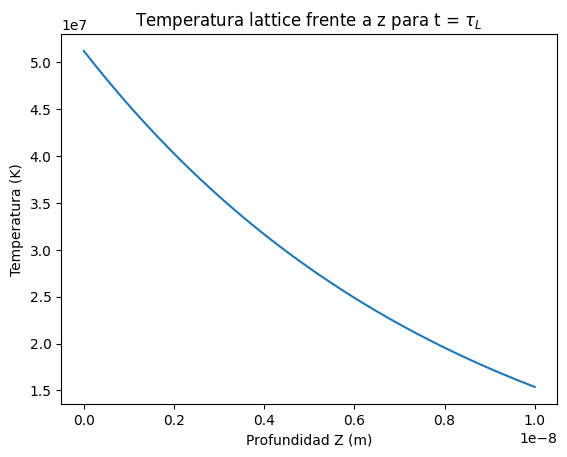

In [27]:
plt.plot(z,Ti)
plt.title(r"Temperatura lattice frente a z para t = $\tau_L$ ")
plt.ylabel("Temperatura (K)")
plt.xlabel("Profundidad Z (m)")
plt.show()